In [21]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,roc_curve, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay,precision_score, recall_score, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate


In [2]:
train_df = pd.read_feather("aggregated_data.ftr")
train_labels_df = pd.read_feather("train_labels.ftr")

In [3]:
xgboost_parameters = {
    'verbosity': 1,
    'max_depth':4, 
    'learning_rate':0.04, 
    'subsample':0.71,
    'colsample_bytree':0.72, 
    'eval_metric':'logloss',
    'objective':'binary:logistic',
    'tree_method': 'gpu_hist'
    }


In [4]:
train_df = train_df.drop(columns=["customer_ID"])
train_labels_df = train_labels_df.drop(columns=["customer_ID"])

In [6]:
xgb_clf = xgb.XGBClassifier(**xgboost_parameters)
print(xgb_clf.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.72, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.04, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.71, 'tree_method': 'gpu_hist', 'validate_parameters': None, 'verbosity': 1}


In [7]:
cv_results = cross_validate(xgb_clf, train_df, train_labels_df["target"], cv=3, scoring=('roc_auc', 'precision', 'recall'), return_train_score=True)
print(sorted(cv_results.keys()))

['fit_time', 'score_time', 'test_precision', 'test_recall', 'test_roc_auc', 'train_precision', 'train_recall', 'train_roc_auc']


In [10]:
print("Precision on validation set: " , cv_results['test_precision'])
print("Recall on validation set: " , cv_results['test_recall'])
print("Roc_auc on validation set: " , cv_results['test_roc_auc'])
print("---------------------")
print("Precision on train set: " , cv_results['train_precision'])
print("Recall on train set: " , cv_results['train_recall'])
print("Roc_auc on train set: " , cv_results['train_roc_auc'])



Precision on validation set:  [0.78909707 0.78842617 0.7927684 ]
Recall on validation set:  [0.78790174 0.79009821 0.79098712]
Roc_auc on validation set:  [0.95136441 0.95230278 0.95310278]
---------------------
Precision on train set:  [0.79266936 0.79360172 0.79170148]
Recall on train set:  [0.79167876 0.79381209 0.78954278]
Roc_auc on train set:  [0.95384953 0.95351821 0.95305351]


In [17]:
def display_metrics(predictor,y_true, y_pred_labels):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    accuracy = accuracy_score(y_true, y_pred_labels)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_pred_labels)
    print("Precision score: ", precision)
    recall = recall_score(y_true, y_pred_labels)
    print("Recall score: ", recall)
    f1 = f1_score(y_true, y_pred_labels)
    print("F1 score: ", f1)
    rocauc = roc_auc_score(y_true, y_pred_labels)
    print("roc_auc score: ", rocauc)
    conf_matrix = confusion_matrix(y_true, y_pred_labels)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=predictor.classes_).plot(ax=ax1)


In [27]:
xgb_clf.fit(train_df, train_labels_df["target"])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.72,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

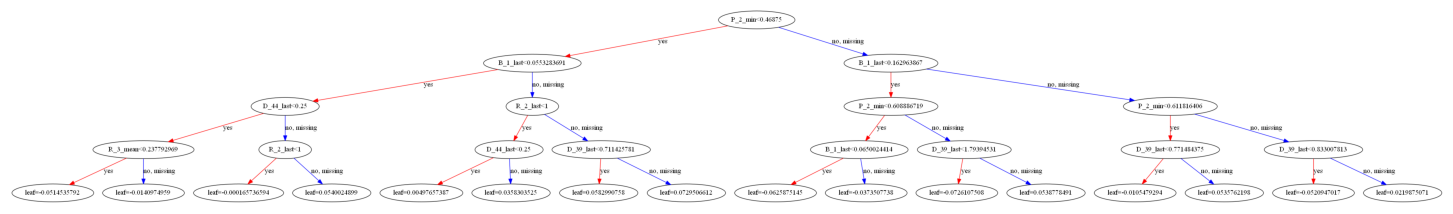

In [34]:
fig, ax = plt.subplots(figsize=(30, 30))
# Or get a matplotlib axis
ax = xgb.plot_tree(xgb_clf, num_trees=2, ax=ax)
plt.gcf().set_size_inches(18.5, 10.5)
# Get feature importances
plt.show()